# 선형 대수

자, 이제 데이터를 저장하고 조작하는 방법을 배웠으니, 모델에 대한 대부분을 이해하는데 필요한 기초적인 선형 대수 일부를 간단하게 살펴보겠습니다. 기초적인 개념과 관련된 수학 표기법, 그리고 코드로의 구현까지 모두 소개할 것입니다. 기본 선형 대수에 익숙하다면, 이 절은 빨리 읽거나 다음 절로 넘어가도 됩니다.

In [1]:
import numpy as np

## 도입부

다음과 같은 연립방정식을 생각해보자.
```
5*x - 3*y + 2*z = 5
 -x + 4*y - 2*z = 1
  x  +  y  -  z = 0
```

In [2]:
x, y, z = [1,2,3]

In [3]:
print(np.sum(np.array([5, -3, 2]) * np.array([x, y, z]))) # = 5
print(np.sum(np.array([-1, 4, -2]) * np.array([x, y, z]))) # = 1
print(np.sum(np.array([1, 1, -1]) * np.array([x, y, z]))) # = 0

5
1
0


In [4]:
A1 = np.array([5, -3, 2])
A2 = np.array([-1, 4, -2])
A3 = np.array([1, 1, -1])
Y = np.array([x, y, z])

$$a \cdot b = \sum_k {a_k b_k}$$

In [5]:
np.sum(A1*Y) == A1.dot(Y)

True

```
A1 . Y = 5
A2 . Y = 1
A3 . Y = 0
```

In [6]:
A = np.array([A1, A2, A3])
A

array([[ 5, -3,  2],
       [-1,  4, -2],
       [ 1,  1, -1]])

$$\begin{aligned}
A \cdot y &= x \\
x_i &= \sum_k A_{ik} y_k
\end{aligned}$$

In [7]:
A.dot(Y)

array([5, 1, 0])

In [8]:
A.dot(Y) == np.array([5, 1, 0])

array([ True,  True,  True])

```
5*x - 3*y + 2*z = 5
 -x + 4*y - 2*z = 1
  x  +  y  -  z = 0
```

방정식의 해를 구하는 방법으로 오일러의 소거법

In [9]:
z == x + y
5*y - 3*z == 1

True

In [10]:
z == (5*y - 1) / 3

True

In [11]:
(5*y - 1) / 3 == x + y
x == 2*y/3 - 1/3

True

In [12]:
x, y, z

(1, 2, 3)

#### 항등행렬 I
$$I : I \cdot x = x^T \cdot I = x$$
$$I : I \cdot A = A \cdot I = A$$

In [13]:
np.eye(3).dot(np.array([5,1,2]))

array([5., 1., 2.])

In [14]:
Y.dot(np.eye(3))

array([1., 2., 3.])

In [15]:
A.dot(Y) == np.array([5,1,2])

array([ True,  True, False])

#### 역행렬
$A^{-1} : A \cdot A^{-1} = A^{-1} \cdot A = I$

$$\begin{align}
A \cdot y &= x\\
\left( A^{-1} \cdot A \right) \cdot y &= A^{-1} \cdot x \\
I \cdot y &= A^{-1} \cdot x \\
y &= A^{-1} \cdot x 
\end{align}$$

### 머신러닝에서의 선형대수
#### 회귀
```
age,sex,bmi,children,smoker,region,expenses
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62
46,female,33.4,1,no,southeast,8240.59
37,female,27.7,3,no,northwest,7281.51
```
$$ \begin{align}
\text{Regression Model : }y &= X \cdot w + b + e = \hat y + e \\
\text{Numpy array shape : }(n,) &= (n, p) \cdot (p,) + (1,) + (n,)
\end{align} $$
- $e = y - \hat y$
- $n = 8$ : 데이터의 수
- $p = 6$ : 변수의 수

$$ \begin{align}
e &= y - \hat y \\
\sum_i e_i &\sim 0 \text{  : not good!!} \\
\sum_i e_i^2 &\sim 0 \text{  : good!!}\\
\text{argmin}_{w,b} \sum_i e_i^2 \\
\end{align} $$

$$ \begin{align}
e &= y - \hat y \\
Loss &= e^T \cdot e \\
&= (y - X \cdot w)^T \cdot (y - X \cdot w) \\
&= y^T \cdot y - y^T \cdot X \cdot w - w^T \cdot X^T \cdot y + w^T \cdot X^T \cdot X \cdot w \\
\text{shape : } &= (n,) \cdot (n,) - (n,) \cdot (n, p) \cdot (p,) - (p,) \cdot (p, n) \cdot (n,)
+ (p,) \cdot (p, n) \cdot (n, p) \cdot (p,) \\
&= y^T \cdot y - 2 y^T \cdot X \cdot w + w^T \cdot X^T \cdot X \cdot w \\
&= a w^2 + b w + c \\
\left| \cfrac {d Loss}{d w} \right|_{w=\hat w} &= 0
\end{align} $$

## 스칼라(scalar)

선형대수나 머신 러닝을 배워본 적이 없다면, 아마도 한번에 하나의 숫자를 다루는데 익숙할 것입니다. 예를 들어, 팔로 알토의 기온이 화씨 52도입니다. 공식 용어를 사용하면 이 값은 *스칼라(scalar)* 입니다. 이 값을 섭씨로 바꾸기를 원한다면,  ​$c = (f - 32) * 5/9$ 공식에  ​$f$ 값으로  ​$52$ 대입하면 됩니다. 이 공식에서 각 항들  ​$32$, ​$5$, ​$9$ 은 스칼라 값입니다. 플래이스 홀더 ​$c$ 와 ​$f$ 를 변수라고 부르고, 아직 정해지지 않은 스칼라 값들을 위해 있습니다.

수학적인 표기법으로는 우리는 스칼라를 소문자($x​$, $y​$, $z​$)로 표기 합니다. 또한 모든 스칼라에 대한 공간은  $\mathcal{R}​$로 적습니다. 이후에 공간이 정확히 무엇인지를 알아보겠지만, 편의상 지금은 $x​$ 가 스칼라라고 이야기하는 것은 $x \in \mathcal{R}​$ 로 표현하기로 하겠습니다.

numpy에서 스칼라는 하나의 원소를 갖는 ndArray로 표현됩니다. 아래 코드에서는 두 개의 스칼라를 생성하고, 친숙한 수치 연산 - 더하기, 빼기, 나누기, 그리고 제곱을 수행합니다.

In [16]:
x = np.array([3.0])
y = np.array([2.0])

print('x + y = ', x + y)
print('x * y = ', x * y)
print('x / y = ', x / y)
print('x ** y = ', np.power(x,y))

x + y =  [5.]
x * y =  [6.]
x / y =  [1.5]
x ** y =  [9.]


float 함수를 이용하면 NDArray를 Python의 float 형으로 변환할 수 있습니다. 하지만 이렇게 하는 것은 좋은 아이디어가 아님을 알아두세요. 그 이유는 이를 수행하는 동안, 프로세스 제어를 Python에게 줘야하기 때문에 NDArray는 결과를 내기 위한 다른 것들을 모두 멈춰야 합니다. 아쉽게도, Python은 병렬로 일을 처리하는데 좋지 못합니다. 이런 연산을 코드나 네트워크에서 수행한다면 학습하는데 오랜 시간이 걸릴 것입니다.

In [17]:
float(x)

3.0

## 벡터(vector)

벡터를 ``[1.0,3.0,4.0,2.0]`` 처럼 숫자들의 리스트로 생각할 수 있습니다. 벡터의 각 숫자는 하나의 스칼라 변수로 이루어져 있습니다. 이 숫자들을 우리는 벡터의 *원소* 또는 *구성 요소* 라고 부릅니다. 종종 우리는 실제 세상에서 중요한 값을 담은 벡터들에 관심을 갖습니다. 예를 들어 채무 불이행 위험을 연구하고 있다면, 모든 지원자를 원소가 수입, 재직 기간, 이전의 불이행 횟수 등을 포함한 벡터와 연관을 지을지도 모릅니다. 병원 내 환자들의 심장 마비 위험을 연구하는 사람은, 환자들을 최근 바이탈 사인, 콜레스테롤 지수, 하루 운동 시간 등을 원소로 갖는 벡터로 표현 할 것입니다. 수학적인 표기 법을 이용할 때 벡터는 굵은 글씨체로 소문자  ($\mathbf{u}$, $\mathbf{v}$, $\mathbf{w})$ 를 사용해서 표현합니다. MXNet에서는 임의의 숫자를 원소로 갖는 1D NDArray를 이용해서 벡터를 다루게 됩니다.

In [18]:
x = np.arange(4)
print('x = ', x)

x =  [0 1 2 3]


첨자를 사용해서 벡터의 요소를 가리킬 수 있습니다. 즉, $\mathbf{u}​$ 의 4번째 요소는  $u_4​$ 로 표현합니다.  $u_4​$ 는 스칼라이기 때문에 굵은 글씨가 아닌 폰트로 표기하는 것을 유의하세요. 코드에는 `NDArray` 의  $i​$ 번째  인덱스로 이를 지정합니다.

In [19]:
x[3]

3

## 길이, 차원(dimensionality), 모양(shape)

앞 절에서 소개한 개념 몇 개를 다시 살펴보겠습니다. 벡터는 숫자들의 배열입니다. 모든 배열은 길이를 갖듯이, 벡터도 길이를 갖습니다. 벡터 $\mathbf{x}$ 가 $n$ 개의 실수 값을 갖는 스칼라들로 구성되어 있다면, 이는 수학적인 표현으로 $\mathbf{x} \in \mathcal{R}^n$ 로 적습니다. 벡터의 길이는 일반적으로 차원($dimension$) 이라고 합니다. Python 배열처럼, NDArray의 길이도 Python의 내장 함수 `len()` 를 통해서 얻을 수 있습니다.

벡터의 길이는 `.shape` 속성으로도 얻을 수 있습니다. shape은 NDArray 객체의 각 축에 대한 차원의 목록으로 표현됩니다. 벡터는 축이 하나이기 때문에, 벡터의 모양(shape)은 하나의 숫자로 표현됩니다.

In [20]:
x.shape

(4,)

차원(dimension)이라는 단어가 여러가지 의미로 사용되기 때문에, 헷갈릴 수도 있습니다. 어떤 경우에는 벡터의 *차원(dimensionality)* 을 벡터의 길이 (원소들의 수)로 사용하기도 하고, 어떤 경우에는 배열의 축의 개수로 사용되기도 합니다. 후자의 경우에는 스칼라는 0 차원을 갖고, 벡터는 1차원을 갖습니다.

**혼동을 줄이기 위해서, 우리는 2D 배열 또는 3D 배열이라고 말할 때, 축이 각각 2개 3개인 배열을 의미하도록 합니다. 하지만 만약 *n-*차원 벡터라고 하는 경우에는, 길이가 *n* 인 벡터를 의미합니다.**

In [21]:
a = 2
x = np.array([1,2,3])
y = np.array([10,20,30])
print(a * x)
print(a * x + y)

[2 4 6]
[12 24 36]


## 행렬(matrix)

벡터가 오더 0인 스칼라를 오더 1로 일반화하는 것처럼, 행렬은 1$D$에서 2$D$ 로 벡터를 일반화합니다. 일반적으로 대문자 ($A$, $B$, $C$)로 표현하는 행렬은 코드에서는 축이 2개인 배열로 표현합니다. 시각화한다면, 행렬은 원소 $a_{ij}$ 가 $i$-열, $j$-행에 속하는 표로 그릴 수 있습니다. 

$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1m} \\
 a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{pmatrix}​$$

MXNet에서는 $n$ 행, $m$ 열을 갖는 행렬을 만드는 방법은 두 요소를 갖는 `(n,m)`  모양(shape)을 이용해서 `ones` 또는 `zeros` 함수를 호출을 통해  `ndarray` 를 얻는 것입니다.

In [22]:
A = np.arange(20).reshape((5,4))
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


행렬은 유용한 자료 구조입니다. 행렬을 이용해서 서로 다른 양식의 변형을 갖는 데이터를 구성할 수 있습니다. 예를 들어보면, 행렬의 행들은 서로 다른 환자에 대한 정보를, 열은 서로 다른 속성에 대한 정보를 의미할 수 있습니다.

행렬 $A$ 의 스칼라 원소 $a_{ij}$ 을 지정하는 방법은 행($i$)과 열($j$)에 대한 인덱스를 지정하면 됩니다. `:` 를 사용해서 공백으로 두면, 해당 차원의 모든 원소를 의미합니다. (앞 절에서 봤던 방법입니다.)

행렬을 전치하는 방법은 `T` 를 이용합니다. 전치 행렬은 만약 $B = A^T​$ 이면, 모든 $i​$ 과 $j​$ 에 대해서 $b_{ij} = a_{ji}​$ 인 행렬을 의미합니다.

In [23]:
print(A.T)

[[ 0  4  8 12 16]
 [ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]]


## 텐서(tensor)

벡터가 스칼라를 일반화하고, 행렬이 벡터를 일반화하는 것처럼 더 많은 축을 갖는 자료 구조를 만들 수 있습니다. 텐서(tensor)는 임의의 개수의 축을 갖는 행렬을 표현하는 일반적인 방법을 제공합니다. 예를 들어 벡터는 1차 오더(order) 텐서이고, 행렬은 2차 오더(order) 텐서입니다.

3D 자료 구조를 갖는 이미지를 다룰 때 텐서를 사용하는 것은 아주 중요하게 됩니다. 즉, 각 축이 높이, 넓이, 그리고 세가지 색(RGB) 채널을 의미합니다. 지금은 이것에 대한 내용은 생략하고, 기본적인 것을 확실하게 아는 것을 목표로 하겠습니다.

In [24]:
X = np.arange(24).reshape((2, 3, 4))
print('X.shape =', X.shape)
print('X =', X)

X.shape = (2, 3, 4)
X = [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


## 텐서 연산의 기본 성질

스칼라, 벡터, 행렬, 그리고 어떤 오더를 갖는 텐서들은 우리가 자주 사용할 유용한 특성들을 가지고 있습니다. 요소별 연산(element-wise operation)의 정의에서 알 수 있듯이, 같은 모양(shape)들에 대해서 연산을 수행하면, 요소별 연산의 결과는 같은 모양(shape)을 갖는 텐서입니다. 또다른 유용한 특성은 모든 텐서에 대해서 스칼라를 곱하면 결과는 같은 모양(shape)의 텐서입니다. 수학적으로 표현하면, 같은 모양(shape)의 두 텐서 $X$와 $Y$가 있다면 $\alpha X + Y$ 는 같은 모양(shape)을 갖습니다.

In [25]:
a = 2
x = np.ones(3)
y = np.zeros(3)
print(x.shape)
print(y.shape)
print((a * x).shape)
print((a * x + y).shape)

(3,)
(3,)
(3,)
(3,)


더하기와 스칼라 곱으로 보존되는 특성이 모양(shape) 뿐만은 아닙니다. 이 연산들은 벡터 공간의 맴버쉽을 보존해줍니다. 하지만, 여러분의 첫번째 모델을 만들어서 수행하는데 중요하지 않기 때문에, 이 장의 뒤에서 설명하겠습니다.

## 합과 평균

임의의 텐서들로 수행할 수 있는 조금 더 복잡한 것은 각 요소의 합을 구하는 것입니다. 수학기호로는 합을  $\sum​$ 로 표시합니다. 길이가 $d​$ 인 벡터 $\mathbf{u}​$ 의 요소들의 합은  $\sum_{i=1}^d u_i​$ 로 표현하고, 코드에서는 `nd.sum()` 만 호출하면 됩니다.

In [26]:
print(x)
print(np.sum(x))

[1. 1. 1.]
3.0


임의의 모양(shape)을 갖는 텐서의 원소들의 합을 비슷하게 표현할 수 있습니다. 예를 들어 $m \times n$ 행렬 $A$ 의 원소들의 합은 $\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$ 이고, 코드로는 다음과 같습니다.

In [27]:
A = np.arange(120).reshape(10,12)
print(A)
print(np.sum(A))

[[  0   1   2   3   4   5   6   7   8   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22  23]
 [ 24  25  26  27  28  29  30  31  32  33  34  35]
 [ 36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71]
 [ 72  73  74  75  76  77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107]
 [108 109 110 111 112 113 114 115 116 117 118 119]]
7140


합과 관련된 것으로 *평균(mean)* 이 있습니다. (*average*라고도 합니다.) 평균은 원소들의 합을 원소들의 개수로 나눠서 구합니다. 어떤 벡터  $\mathbf{u}$ 의 평균을 수학 기호로 표현하면  $\frac{1}{d} \sum_{i=1}^{d} u_i$ 이고, 행렬  $A$ 에 대한 평균은 s  $\frac{1}{n \cdot m} \sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$ 이 됩니다. 코드로 구현하면, 임의의 shape을 갖는 텐서의 평균은 `nd.mean()` 을 호출해서 구합니다.

In [28]:
print(np.mean(A))
print(np.sum(A) / A.size)

59.5
59.5


## 점곱(dot product)

지금까지는 원소들 사이에 연산인 더하기와 평균에 대해서 살펴봤습니다. 이 연산들이 우리가 할 수 있는 전부라면, 선형대수를 별도의 절로 만들어서 설명할 필요가 없을 것입니다. 즉, 가장 기본적인 연산들 중에 하나로 점곱(dot product)이 있습니다. 두 벡터, $\mathbf{u}​$ 와 $\mathbf{v}​$, 가 주어졌을 때, 점곱,  $\mathbf{u}^T \mathbf{v}​$ ,은 요소들끼리 곱을 한 결과에 대한 합이 됩니다. 즉, $\mathbf{u}^T \mathbf{v} = \sum_{i=1}^{d} u_i \cdot v_i​$.

In [29]:
x = np.arange(4)
y = np.ones(4)
print(x, y, np.dot(x, y))

[0 1 2 3] [1. 1. 1. 1.] 6.0


두 벡터의 점곱  ``nd.dot(x, y)`` , 은 원소들끼리의 곱을 수행한 후, 합을 구하는 것과 동일합니다.

In [30]:
np.sum(x * y)

6.0

점곱은 다양한 경우에 유용하게 사용됩니다. 예를 들어, 가중치들의 집합 $\mathbf{w}$ 에 대해서, 어떤 값 $u$ 의 가중치를 적용한 합은 점곱인 $\mathbf{u}^T \mathbf{w}$으로 계산될 수 있습니다. 가중치들이 0 또는 양수이고, 합이 1  $\left(\sum_{i=1}^{d} {w_i} = 1\right)$ 인 경우, 행렬의 곱은 *가중치 평균(weighted average)* 을 나타냅니다. 길이가 1인 두 벡터 (길이가 무엇인지는 아래에서 norm을 설명할 때 다룹니다)가 있을 때, 점곱을 통해서 두 벡터 사이의 코사인 각을 구할 수 있습니다.

## 행렬-벡터 곱

점곱을 어떻게 계산하는지 알아봤으니, 행렬-벡터 곱을 알아볼 준비가 되었습니다. 우선 행렬 $A$ 와 열벡터  $\mathbf{x}$ 를 시각적으로 표현하는 것으로 시작합니다.

$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1m} \\
 a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nm} \\
\end{pmatrix},\quad\mathbf{x}=\begin{pmatrix}
 x_{1}  \\
 x_{2} \\
\vdots\\
 x_{m}\\
\end{pmatrix} ​$$

행렬을 다시 행벡터 형태로 표현이 가능합니다.

$$A=
\begin{pmatrix}
\mathbf{a}^T_{1} \\
\mathbf{a}^T_{2} \\
\vdots \\
\mathbf{a}^T_n \\
\end{pmatrix},​$$

여기서 각  $\mathbf{a}^T_{i} \in \mathbb{R}^{m}$ 는 행렬의 $i$ 번째 행을 표시하는 행벡터입니다.

그러면 행렬-벡터 곱 $\mathbf{y} = A\mathbf{x}​$ 은 컬럼 벡터  $\mathbf{y} \in \mathbb{R}^n​$ 이며, 각 원소 $y_i​$ 는 점곱 $\mathbf{a}^T_i \mathbf{x}​$ 입니다.

$$A \cdot \mathbf{x}=
\begin{pmatrix}
\mathbf{a}^T_{1}  \\
\mathbf{a}^T_{2}  \\
 \vdots  \\
\mathbf{a}^T_n \\
\end{pmatrix}
\begin{pmatrix}
 x_{1}  \\
 x_{2} \\
\vdots\\
 x_{m}\\
\end{pmatrix}
= \begin{pmatrix}
 \mathbf{a}^T_{1} \mathbf{x}  \\
 \mathbf{a}^T_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^T_{n} \mathbf{x}\\
\end{pmatrix}$$

즉, 행렬 $A\in \mathbb{R}^{n \times m}​$ 로 곱하는 것을 벡터를 $\mathbb{R}^{m}​$ 에서 $\mathbb{R}^{n}​$로 사영시키는 변환으로도 생각할 수 있습니다.

이런 변환은 아주 유용하게 쓰입니다. 예를 들면, 회전을 정사각 행렬의 곱으로 표현할 수 있습니다. 다음 절에서 보겠지만, 행렬-벡터 곱을 뉴럴 네트워크의 각 층의 연산을 표현하는데도 사용합니다.

`ndarray'` 를 이용해서 행렬-벡터의 곱을 계산할 때는 점곱에서 사용했던 `nd.dot()` 함수를 동일하게 사용합니다. 행렬 `A` 와 벡터 `x` 를 이용해서 `nd.dot(A,x)` 를 호출하면, MXNet은 행렬-벡터 곱을 수행해야한다는 것을 압니다. `A` 의 열의 개수와 `x` 의 차원이 같아야 한다는 점을 유의하세요.

In [31]:
# (5, 4) . (4,) = (5, )
A = np.arange(20).reshape((5,4))
np.dot(A, x)

array([ 14,  38,  62,  86, 110])

## 행렬-행렬 곱

점곱과 행렬-벡터 곱을 잘 이해했다면, 행렬-행렬 곱은 아주 간단할 것입니다.

행렬 $A \in \mathbb{R}^{n \times k}​$,  $B \in \mathbb{R}^{k \times m}​$ 가 있다고 하겠습니다.

$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{pmatrix},\quad
B=\begin{pmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{pmatrix}​$$

행렬의 곱  $C = AB$ 를 계산하기 위해서,  $A$ 를 행벡터들로,  $B$ 를 열벡터들로 생각하면 쉽습니다.

$$A=
\begin{pmatrix}
\mathbf{a}^T_{1} \\
\mathbf{a}^T_{2} \\
\vdots \\
\mathbf{a}^T_n \\
\end{pmatrix},
\quad B=\begin{pmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{pmatrix}.$$

각 행벡터  $\mathbf{a}^T_{i}$ 는  $\mathbb{R}^k$ 에 속하고, 각 열벡터 $\mathbf{b}_j$ 는  $\mathbb{R}^k$ 에 속한다는 것을 주의하세요.

그러면, 행렬  $C \in \mathbb{R}^{n \times m}$ 의 각 원소 $c_{ij} = \mathbf{a}^T_i \mathbf{b}_j = \sum_{u=1}^k {a_{iu}b_{uj}}$ 로 구해집니다.

$$C = AB = \begin{pmatrix}
\mathbf{a}^T_{1} \\
\mathbf{a}^T_{2} \\
\vdots \\
\mathbf{a}^T_n \\
\end{pmatrix}
\begin{pmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{pmatrix}
= \begin{pmatrix}
\mathbf{a}^T_{1} \mathbf{b}_1 & \mathbf{a}^T_{1}\mathbf{b}_2& \cdots & \mathbf{a}^T_{1} \mathbf{b}_m \\
 \mathbf{a}^T_{2}\mathbf{b}_1 & \mathbf{a}^T_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^T_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^T_{n} \mathbf{b}_1 & \mathbf{a}^T_{n}\mathbf{b}_2& \cdots& \mathbf{a}^T_{n} \mathbf{b}_m
\end{pmatrix}
$$

행렬-행렬 곱 $AB$ 을 단순히 $m$ 개의 행렬-벡터의 곱을 수행한 후, 결과를 붙여서  $n \times m$ 행렬로 만드는 것으로 생각할 수도 있습니다. 일반적인 점곱과 행렬-벡터 곱을 계산하는 것처럼 MXNet에서 행렬-행렬의 곱은 `nd.dot()` 으로 계산됩니다.

In [32]:
B = np.ones(shape=(4, 3))
np.dot(A, B)

array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]])

In [33]:
A.shape, B.shape

((5, 4), (4, 3))

## 놈(norm)

모델을 구현하기 전에 배워야할 개념이 하나 더 있습니다. 선형대수에서 가장 유용한 연산 중에 놈(norm) 이 있습니다. 엄밀하지 않게 설명하면, **놈은 벡터나 행렬이 얼마나 큰지를 알려주는 개념**입니다.  $\|\cdot\|$ 으로 놈을 표현하는데,  $\cdot$ 은 행렬이나 벡터가 들어갈 자리입니다. 예를 들면, 벡터 $\mathbf{x}$ 나 행렬 $A$ 를 각각 $\|\mathbf{x}\|$ or $\|A\|$ 로 적습니다.

모든 놈은 다음 특성을 만족시켜야 합니다.

1. $\|\alpha A\| = |\alpha| \|A\|$
1. $\|A + B\| \leq \|A\| + \|B\|$
1. $\|A\| \geq 0$
1. If $\forall {i,j}, a_{ij} = 0$, then $\|A\|=0$

위 규칙을 말로 설명하면, 첫번째 규칙은 행렬이나 벡터의 모든 원소에 상수 $\alpha$ 만큼 스캐일을 바꾸면, 놈도 그 상수의 *절대값* 만큼 스캐일이 바뀐다는 것입니다. 두번째 규칙은 친숙한 삼각부등식입니다. 세번째는 놈은 음수가 될 수 없다는 것입니다. 거의 모든 경우에 가장 작은 크기가 0이기에 이 규칙은 당연합니다. 마지막 규칙은 가장 작은 놈은 행렬 또는 벡터가 0으로 구성되었을 경우라는 기본적인 것에 대한 것입니다. 0이 아닌 행렬에 놈이 0이 되도록 놈을 정의하는 것이 가능합니다. 하지만, 0인 행렬에 0이 아닌 놈이 되게 하는 놈을 정의하는 것은 불가능합니다. 길게 설명했지만, 이것을 이해했다면 중요한 개념을 얻었을 것입니다.

수학시간에 배운 유클리디안 거리(Euclidean distance)를 기억한다면, 0이 아닌 것과 삼각부등식이 떠오를 것입니다. 놈이 거리를 측정하는 것과 비슷하다는 것을 인지했을 것입니다.

사실 유클리디안 거리 $\sqrt{x_1^2 + \cdots + x_n^2}$ 는 놈입니다. 특히, 이를  $\ell_2$-놈이라고 합니다. 행렬의 각 원소에 대해서 유사하게 계산한 것   $\sqrt{\sum_{i,j} a_{ij}^2}$ 을 푸로베니우스 놈(Frobenius norm)이라고 합니다. 머신 러닝에서는 자주 제곱  $\ell_2$ 놈을 사용합니다. ($\ell_2^2$ 로 표현합니다.)  $\ell_1$ 놈도 흔히 사용합니다.  $\ell_1$ 놈은 절대값들의 합으로, 이상치(outlier)에 덜 중점을 주는 편리한 특성이 있습니다.

 $\ell_2​$ 놈의 계산은 `nd.norm()` 으로 합니다.

In [34]:
x

array([0, 1, 2, 3])

In [35]:
np.linalg.norm(x)

3.7416573867739413

In [36]:
np.sqrt(np.square(x).sum())

3.7416573867739413

$\ell_1​$ 놈을 계산하는 방법은 각 원소의 절대값을 구한 후, 모두 합하는 것입니다.

In [37]:
np.abs(x).sum()

6

In [38]:
np.linalg.norm(A)

49.69909455915671

## 놈(norm)와 목적(objective)

더 깊이 나가지는 않겠지만, 이 개념들이 왜 중요한지 궁금할 것입니다. 머신 러닝에서 우리는 종종 최적화 문제를 풀기를 시도합니다 - 즉, 관찰된 데이터에 할당된 확률을 *최대화*하기, 예측된 값과 실제 값의 차이를 *최소화*하기, 단어, 제품, 새로운 기사와 같은 아이템들에 가까운 아이템들의 거리가 최소화되는 벡터를 할당하기 등을 시도합니다. 아마도 머신 러닝 알고리즘의 (데이터를 제외한) 가장 중요한 요소인 이 목적(objective)들은 자주 놈(norm)으로 표현됩니다.

## 중급 선형 대수

여러분이 여기까지 잘 따라오면서 모든 내용을 이해했다면, 솔직하게 여러분은 모델을 시작할 준비가 되었습니다. 먄약 조급함을 느낀다면, 이 절의 나머지는 넘어가도 됩니다. 실제로 적용할 수 있는 유용한 모델들을 구현하는데 필요한 모든 선형대수에 대해서 알아봤고, 더 알고 싶으면 다시 돌아올 수 있습니다.

하지만, 머신 러닝만 고려해봐도 선형대수에 대한 더 많은 내용이 있습니다. 이후 어느 시점에 여러분이 머신 러닝 경력을 만들기를 원한다면, 여기서 다룬 것보다 더 많은 것을 알아야할 것입니다. 유용하고 더 어려운 개념을 소개하면서 이 절을 마치겠습니다.

## 벡터의 기본 성질들

벡터는 숫자를 담는 자료 구조보다 더 유용합니다. 벡터의 원소에 숫자를 읽고 적는 것, 유용한 수학 연산을 수행하는 것과 더불어, 벡터를 재미있는 방법으로 분석할 수 있습니다.

벡터 공간의 개념은 중요한 개념입니다. 벡터 공간이 되기에 필요한 조건은 다음과 같습니다.

- **더하기 공리(Additive axioms)** (x,y,z가 모두 벡터라고 가정합니다.):
  $x+y = y+x​$ , $(x+y)+z = x+(y+z)​$ , $0+x = x+0 = x​$ 그리고 $(-x) + x = x + (-x) = 0​$.
- **곱하기 공리(Multiplicative axioms)** (x는 벡터이고 a, b는 스칼라입니다.):
  $0 \cdot x = 0​$ , $1 \cdot x = x​$ , $(a b) x = a (b x)​$.
- **분배 공리(Distributive axioms)** (x와 y는 벡터, a, b는 스칼라로 가정합니다.):
  $a(x+y) = ax + ay​$ and $(a+b)x = ax +bx​$.

## 특별한 행렬들

이 책에서 사용할 특별한 행렬들이 있습니다. 그 행렬들에 대해서 조금 자세히 보겠습니다.

* **대칭 행렬(Symmetric Matrix)** 이 행렬들은 대각선 아래, 위의 원소들이 같은 값을 갖습니다. 즉,  $M^\top = M$ 입니다. 이런 예로는 짝들의(pairwise) 거리를 표현하는 행렬 $M_{ij} = \|x_i - x_j\|$이 있습니다. 페이스북 친구 관계를 대칭 행렬로 표현할 수 있습니다. $i$ 와 $j$ 가 친구라면 $M_{ij} = 1$ 이 되고, 친구가 아니라면 $M_{ij} = 0$ 로 표현하면 됩니다. 하지만, 트위터 그래프는 대칭이 아님을 주목해세요. $M_{ij} = 1$, 즉 $i$ 가 $j$ 를 팔로우하는 것이 꼭 $j$ 가 $i$ 를 팔로우하는 것, $M_{ji} = 1$, 은 아니기 때문입니다.
* **비대칭 행렬(Antisymmetric Matrix)**  $M^\top = -M​$ 를 만족하는 행렬입니다. 임의의 행렬은 대칭 행렬과 비대칭 행렬로 분해될 수 있습니다. 즉, $M = \frac{1}{2}(M + M^\top) + \frac{1}{2}(M - M^\top)​$ 로 표현될 수 있습니다.
* **대각 지배 행렬(Diagonally Dominant Matrix)** 대각 원소들 보다 대각이 아닌 원소들이 작은 행렬입니다. 즉,  $M_{ii} \geq \sum_{j \neq i} M_{ij}$ 이고 $M_{ii} \geq \sum_{j \neq i} M_{ji}$ 입니다. 어떤 행렬이 이 특성을 갖는다면, 대각원소를 사용해서 $M$ 을 추정할 수 있고, 이를  $\mathrm{diag}(M)$ 로 표기합니다.
* **양의 정부호 행렬(Positive Definite Matrix)** 이 행렬은  $x \neq 0$ 이면,  $x^\top M x > 0$ 인 좋은 특성을 갖습니다. 직관적으로 설명하면, 벡터의 제곱 놈,  $\|x\|^2 = x^\top x$, 의 일반화입니다. $M = A^\top A$ 이면 이 조건이 만족시킨다는 것을 쉽게 확인할 수 있습니다. 이유는  $x^\top M x = x^\top A^\top A x = \|A x\|^2$ 이기 때문입니다. 모든 양의 정부호 행렬은 이런 형태로 표현될 수 있다는 더 심오한 이론이 있습니다.

## 요약

몇 페이지들(또는 Jupyter 노트북 한개)을 통해서 뉴럴 네트워크의 중요한 부분들을 이해하는데 필요한 모든 선형대수에 대해서 알아봤습니다. 물론 선형대수에는 더 많은 내용이 있고, 이것들은 머신 러닝에 유용하게 쓰입니다. 예를 들어, 행렬을 분해할 수 있는데, 이 분해는 실세계의 데이터셋의 아래 차원의 구조를 알려주기도 합니다. 행렬 분해를 이용하는데 집중하는 머신 러닝의 별도의 분야가 있습니다. 이를 이용해서 데이터의 구조를 밝히고 예측 문제를 풀기 위해서 고차원의 텐서를 일반화하기도 합니다. 하지만 이 책에서는 딥러닝에 집중합니다. 여러분이 실제 데이터를 사용해서 유용한 머신 러닝 모델을 만들기 시작한다면, 수학에 대해서 더 관심을 갖게될 것이라고 믿습니다. 하지만 수학적인 내용은 나중에 더 설명하기로 하고, 이 절은 여기서 마무리하겠습니다.

선형 대수에 대해서 더 배우기를 원한다면, 유용한 교재들이 있습니다.

* 탄탄한 기초를 쌓고 싶으면,  Gilbert Strang의 책 [Introduction to Linear Algebra](http://math.mit.edu/~gs/linearalgebra/)를 참고하세요.
* Zico Kolter's [Linear Algebra Review and Reference](http://www.cs.cmu.edu/~zkolter/course/15-884/linalg-review.pdf)

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2317)

![](../img/qr_linear-algebra.svg)

## 행렬 ++
### 연립방정식의 해
다음과 같은 연립방정식을 생각해보자.
```
5*x - 3*y + 2*z = 5
 -x + 4*y - 2*z = 1
  x  +  y  -  z = 0
```

matrix의 shape을 (n, m) 형태로 표현할 수 있다. 이때 n = m 은 행렬을 정방행렬이라 한다.

In [39]:
A = np.array([[5, -3, 2],
             [-1, 4, -2],
             [1, 1, -1]])
A

array([[ 5, -3,  2],
       [-1,  4, -2],
       [ 1,  1, -1]])

미지수가 3개이면, 연립방정식의 3개 이상이어야 유일한 해가 존재한다. 마찬가지로 미지가 2개면, 2개의 방정식이 필요하다.

2원 1차 연립방정식으로 아래 식을 보자
1. 유일한 해가 존재
```
x + y = 5
x - y = 1
```
2. 해가 없음
```
x + y = 5
x - y = 1
2x - y = 3
```
3. 무수히 많은 해
```
x + y = 5
2x + 2y = 10
```


<AxesSubplot:>

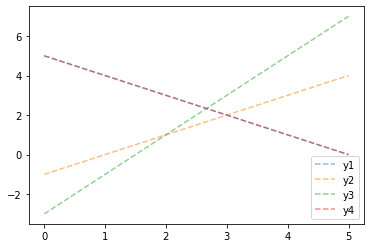

In [40]:
import pandas as pd
x = np.linspace(0, 5, 101)
y1 = 5 - x
y2 = x - 1
y3 = 2*x - 3
y4 = 5 - x
df = pd.DataFrame({'y1':y1, 'y2':y2, 'y3':y3, 'y4':y4}, index=x)
df.plot(alpha=.5, style='--')

연립방정식의 해가 유일하면 non-singular, 유일하지 않으면 singular하다 한다. 이러한 정의는 matrix에도 적용가능하다.

In [41]:
A = np.array([[ 5, -3,  2],
              [-1,  4, -2],
              [ 1,  1, -1]])
A

array([[ 5, -3,  2],
       [-1,  4, -2],
       [ 1,  1, -1]])

연립방정식을 아래와 같이 정의하면:
$$\mathbf A \cdot \mathbf x = \mathbf b$$

In [42]:
b = np.array([5,1,0])

In [43]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [44]:
A.dot(I)

array([[ 5., -3.,  2.],
       [-1.,  4., -2.],
       [ 1.,  1., -1.]])

In [45]:
I.dot(A)

array([[ 5., -3.,  2.],
       [-1.,  4., -2.],
       [ 1.,  1., -1.]])

In [46]:
I.dot(b)

array([5., 1., 0.])

In [47]:
b.dot(I)

array([5., 1., 0.])

역행렬이라는 것이 있어서, A의 역행렬을 $A^{-1}$로 표기한다면, 아래와 같이 정의할 수 있다:
$$A \cdot A^{-1} = A^{-1} \cdot A = I$$

즉, 위에 연립방정식에 대한 solution을 쉽게 구할 수 있다.


$$\begin{align}
A \cdot x &= b\\
A^{-1} \cdot A \cdot x &= A^{-1} \cdot b\\
I \cdot x &= A^{-1} \cdot b\\
x &= A^{-1} \cdot b
\end{align}$$

#### 가우스-조던 소거법
$$A \cdot A^{-1} = I$$

In [48]:
Aorig = A.copy(); Iorig = I.copy()
# A = Aorig.copy(); I = Iorig.copy()
for a, i in zip(A, I):
    print(f"{a} || {i}")

[ 5 -3  2] || [1. 0. 0.]
[-1  4 -2] || [0. 1. 0.]
[ 1  1 -1] || [0. 0. 1.]


In [49]:
# 2번째 줄과 3 줄을 더해서 3줄에 두면
A[2] = A[1] + A[2]; I[2] = I[1] + I[2]
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[ 5 -3  2] || [1. 0. 0.]
[-1  4 -2] || [0. 1. 0.]
[ 0  5 -3] || [0. 1. 1.]


In [50]:
# 2번째 줄을 5배하여 1 줄을 더해서 2줄에 두면
A[1] = 5*A[1] + A[0]; I[1] = 5*I[1] + I[0]
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[ 5 -3  2] || [1. 0. 0.]
[ 0 17 -8] || [1. 5. 0.]
[ 0  5 -3] || [0. 1. 1.]


In [51]:
# 3번째 줄을 17배하여 1 줄을 5배하여 빼주어 3줄에 두면
A[2] = 17*A[2] - 5*A[1]; I[2] = 17*I[2] - 5*I[1]
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[ 5 -3  2] || [1. 0. 0.]
[ 0 17 -8] || [1. 5. 0.]
[  0   0 -11] || [-5. -8. 17.]


In [52]:
# 3번째 줄을 -11로 나누어주면
A[2] = - A[2]/11; I[2] = - I[2]/11
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[ 5 -3  2] || [1. 0. 0.]
[ 0 17 -8] || [1. 5. 0.]
[0 0 1] || [ 0.45454545  0.72727273 -1.54545455]


In [53]:
# 3번째 줄을 8배하여 두번째에 더해주고, 그 결과를 두번째줄로 두면
A[1] = A[1] + 8*A[2]; I[1] = I[1] + 8*I[2]
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[ 5 -3  2] || [1. 0. 0.]
[ 0 17  0] || [  4.63636364  10.81818182 -12.36363636]
[0 0 1] || [ 0.45454545  0.72727273 -1.54545455]


In [54]:
# 첫번째 줄에 3번째 줄을 2배하여 빼주고, 그 결과를 첫번째줄로 두면
A[0] = A[0] - 2*A[2]; I[0] = I[0] - 2*I[2]
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[ 5 -3  0] || [ 0.09090909 -1.45454545  3.09090909]
[ 0 17  0] || [  4.63636364  10.81818182 -12.36363636]
[0 0 1] || [ 0.45454545  0.72727273 -1.54545455]


In [55]:
# 첫번째 줄에 17을 곱하고 2번째 줄을 3배하여 더해주고, 그 결과를 첫번째줄로 두면
A[0] = 17*A[0] + 3*A[1]; I[0] = 17*I[0] + 3*I[1]
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[85  0  0] || [15.45454545  7.72727273 15.45454545]
[ 0 17  0] || [  4.63636364  10.81818182 -12.36363636]
[0 0 1] || [ 0.45454545  0.72727273 -1.54545455]


In [56]:
# 첫번째 줄에 85로 나누고 2번째 줄을 17로 나누어준다.
A[0] = A[0]/85; I[0] = I[0]/85
A[1] = A[1]/17; I[1] = I[1]/17
for a, i in zip(A, I): 
    print(f"{a} || {i}")

[1 0 0] || [0.18181818 0.09090909 0.18181818]
[0 1 0] || [ 0.27272727  0.63636364 -0.72727273]
[0 0 1] || [ 0.45454545  0.72727273 -1.54545455]


In [57]:
from numpy.linalg import inv
inv(Aorig)

array([[ 0.18181818,  0.09090909,  0.18181818],
       [ 0.27272727,  0.63636364, -0.72727273],
       [ 0.45454545,  0.72727273, -1.54545455]])

In [58]:
A = Aorig.copy()
A

array([[ 5, -3,  2],
       [-1,  4, -2],
       [ 1,  1, -1]])

In [59]:
A.dot(inv(A))

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00, 0.00000000e+00],
       [5.55111512e-17, 0.00000000e+00, 1.00000000e+00]])

In [60]:
inv(A).dot(b)

array([1., 2., 3.])

[Quiz] 아래와 같은 2차 정방행렬에 대해 일반적인 역행렬을 구해보자.
```
[['a' 'b']
 ['c' 'd']]
```

In [61]:
arr = np.array([['a', 'b'], ['c', 'd']])
invar = np.array([['x', 'y'], ['w', 'z']])
for a, i in zip(arr, invar):
    print(f"{a} || {i}")

['a' 'b'] || ['x' 'y']
['c' 'd'] || ['w' 'z']


arr.dot(invar) = I를 만족하는 x, y, w, z을 찾으면 된다.

In [62]:
ardotinv = np.array([['ax+bw', 'ay+bz'], ['cx+dw', 'cy+dz']])
I2d = np.array([[1, 0], [0, 1]])
for a, i in zip(ardotinv, I2d):
    print(f"{a} = {i}")

['ax+bw' 'ay+bz'] = [1 0]
['cx+dw' 'cy+dz'] = [0 1]


1. ay+bz = 0 => z = - ay/b
2. cx+dw = 0 => w = - cx/d
3. ax+bw = 1 =2식=> ax - bcx/d = 1
4. cy+dz = 1 =1식=> cy - day/b = 1
5. 3식 => x(ad - bc) = d => x = d/(ad-bc)
6. 4식 => y(bc - ad) = b => y = -b/(ad-bc)
7. 2식,5식 => w = -c/(ad-bc)
8. 1식,6식 => z =  a/(ad-bc)
```
                1
intArr = --------- [['d' '-b']
             (ad -bc)  ['-c' 'a']]
```

In [63]:
arr = np.arange(2, 6).reshape((2,2))
arr

array([[2, 3],
       [4, 5]])

In [64]:
inv(arr)

array([[-2.5,  1.5],
       [ 2. , -1. ]])

In [65]:
a, b = arr[0]; c, d = arr[1]
a, b, c, d

(2, 3, 4, 5)

In [66]:
detArr = a*d - b*c
detArr

-2

In [67]:
np.array([[d, -b], [-c, a]]) / detArr

array([[-2.5,  1.5],
       [ 2. , -1. ]])

### det(A)
행렬의 크기를 나타내는 여러단위
1. L2norm = np.sqrt(np.square(A).sum()), L1norm = np.abs(A).sum()
2. det(A)
3. trace(A) = sum([A[i] for i in range(len(A))])

A의 determinent는 A의 역행렬 존재유무를 나타낸다. det(A) == 0이면 역행렬이 존재하지 않아요.
![image.png](3dDeterm.png)

[Quiz] n 차원의 정방행렬의 det를 리턴하는 함수를 작성해보자.

In [68]:
def detArr(A, ret=0):
    determ = 0

    if len(A) == 2:
        determ = A[0,0]*A[1,1] - A[1,0]*A[0,1]
        return determ
    for i in range(len(A)):
        a = A.copy()
        suba = np.where(i==0, a[1:,1:], 
                        np.where(i==(1-len(a)), a[1:,:-1],
                                np.hstack((a[1:,:i], a[1:,(i+1):]))))
        determ += a[0,i]*(-1)**i * detArr(suba)
    return determ

In [69]:
arr = np.arange(1, 26).reshape((5,5))
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [70]:
arr[:,:1], arr[:,-1:]

(array([[ 1],
        [ 6],
        [11],
        [16],
        [21]]),
 array([[ 5],
        [10],
        [15],
        [20],
        [25]]))

In [71]:
np.concatenate((arr[:,:1], arr[:,-1:]), axis=1)
np.hstack((arr[:,:1], arr[:,-1:]))

array([[ 1,  5],
       [ 6, 10],
       [11, 15],
       [16, 20],
       [21, 25]])

In [72]:
detArr(arr)

0

In [73]:
A

array([[ 5, -3,  2],
       [-1,  4, -2],
       [ 1,  1, -1]])

In [74]:
detArr(A)

-11

In [75]:
np.linalg.det(A)

-11.000000000000002

#### 대각행렬
주대각성분만 값을 가지고 있는 행렬

In [76]:
A = np.array([[ 5, -3,  2],
              [-1,  4, -2],
              [ 1,  1, -1]])
A

array([[ 5, -3,  2],
       [-1,  4, -2],
       [ 1,  1, -1]])

In [77]:
D = np.eye(3)
for i, k in zip(range(3), [1/5, 1/4, -1]):
    D[i] *= k
D

array([[ 0.2 ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ],
       [-0.  , -0.  , -1.  ]])

임의 matrix에 diagonal matrix D를 dot 연산하면:
1. $A\cdot D [:,i] = A[:,i]*D[i,i]$
2. $D\cdot A [i,:] = A[i,:]*D[i,i]$

In [78]:
A.dot(D)

array([[ 1.  , -0.75, -2.  ],
       [-0.2 ,  1.  ,  2.  ],
       [ 0.2 ,  0.25,  1.  ]])

In [79]:
D.dot(A)

array([[ 1.  , -0.6 ,  0.4 ],
       [-0.25,  1.  , -0.5 ],
       [-1.  , -1.  ,  1.  ]])

[Quiz] 다음을 구해보자.
1. D와 $A \cdot D$의 det를 구해보자.
2. $A \cdot D$의 det는 det(D)\*det(A)와 같음을 보여라.

In [80]:
D

array([[ 0.2 ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  ],
       [-0.  , -0.  , -1.  ]])

대각 해렬의 det는 다음과 같이 대각성분의 곱으로 표현된다.
$$det(D) = \Pi_i D_{ii}$$

In [81]:
print(detArr(D))
detD = D.diagonal().prod()
detD

-0.05


-0.05

In [82]:
detA = detArr(A)
detA

-11

det에 대한 일반적인 원리:
1. $det(A \cdot B) = det(A) * det(B)$
2. $det(A \cdot B) = det(B \cdot A)$
 - dot 연산은 교환법칙이 성리하지 않으나, det에서는 성립한다.

In [83]:
detAD, detDA = detArr(A.dot(D)), detArr(D.dot(A))
detAD, detDA, detD*detA

(0.5499999999999999, 0.5499999999999999, 0.55)

### 삼각행렬
일반적인 정사각행렬 A를 하삼각행렬 L과 상삼각행렬 U로 분해하는 [LU분해](https://ko.wikipedia.org/wiki/LU_%EB%B6%84%ED%95%B4)에 많이 사용된다.
- A의 모든 주대각성분이 0이 않되도록 행교환을 해주어야 한다.
 - 모든 정사각행렬 A는 LUP 분해가 가능하다.
 - 행교환을 포함한 분해를 LUP 변환이라 한다: $PA = LU$
 - 대각행렬을 포함한다면 LDU 변환이라 한다: $A = LDU$
- 하삼각행렬(lower triangular matrix): 주대각선 위의 모든 성분이 0인 정사각행렬
- 상삼각행렬(upper triangular matrix): 주대각선 아래의 모든 성분이 0인 정사각행렬
![](https://media.vlpt.us/images/dhelee/post/a98f0448-8ecd-4fc4-8052-53d0cbacf3cd/image.png)
$${\displaystyle {\begin{bmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{bmatrix}}={\begin{bmatrix}l_{11}&0&0\\l_{21}&l_{22}&0\\l_{31}&l_{32}&l_{33}\end{bmatrix}}{\begin{bmatrix}u_{11}&u_{12}&u_{13}\\0&u_{22}&u_{23}\\0&0&u_{33}\end{bmatrix}}}$$

A, B를 상삼각행렬(upper triangular matrix)이라 하자.
1. 만일 A가 가역(invertible)행렬이면 A<sup>-1</sup>도 상삼각행렬이다.
2. 만일 모든 i에 대하여 A<sub>ii</sub> = 1이면  A<sup>-1</sup>의 주대각선성분들도 모두 1이다
3. 상삼각행렬은 대각행렬과 같이 $det(A) = \Pi_i A_{ii}$

In [84]:
import numpy as np
def upperTriangular(n):
    arr = np.random.randn(n,n)*10
    for i in range(n):
        for j in range(i):
            arr[i,j]  = 0
    return arr

In [85]:
A, B = upperTriangular(5), upperTriangular(5)
print(A, "\n", B)

[[ -9.13501125   2.04856982   7.2698236   23.67448616  -4.28746305]
 [  0.         -14.03711669 -20.5484415    2.31965916  10.29675176]
 [  0.           0.           0.19715084  -3.22287113  10.87345193]
 [  0.           0.           0.          -0.15338125  -3.00695226]
 [  0.           0.           0.           0.           3.84465167]] 
 [[ -4.97736253   6.24740891   4.47171656  11.96620809  -8.40677555]
 [  0.         -25.46177423  -1.30543562  -8.84751539  11.48765003]
 [  0.           0.          11.02998785  -5.06575756  12.3480291 ]
 [  0.           0.           0.         -29.91657992   0.8067159 ]
 [  0.           0.           0.           0.           1.47564526]]


In [86]:
def isUpperTriangular(a):
    n = len(a)
    IUT = True
    for i in range(n):
        for j in range(i):
            if a[i,j]:
                IUT = False
                break
    return IUT

In [87]:
isUpperTriangular(A.dot(B))

True

In [88]:
from numpy.linalg import inv
isUpperTriangular(inv(A)) and isUpperTriangular(inv(B))

True

[Quiz] 다음을 수행하세요.
1. 상삼각행렬의 det는 대각행렬과 같다는 것을 증명하자.
2. 하삼각행렬을 생성하는 lowerTriangular 함수와 이를 확인하는 isLowerTriangular를 작성하세요.
3. 위 함수를 이용하여 A, B 두 하삼각행렬을 생성하고, 곱연산과 역행렬이 하삼각행렬임을 확인하세요.

In [89]:
for i in range(5):
    for j in range(5):
        print(f"{A[i,j]:>6.03}", end=", ")
    print()

 -9.14,   2.05,   7.27,   23.7,  -4.29, 
   0.0,  -14.0,  -20.5,   2.32,   10.3, 
   0.0,    0.0,  0.197,  -3.22,   10.9, 
   0.0,    0.0,    0.0, -0.153,  -3.01, 
   0.0,    0.0,    0.0,    0.0,   3.84, 


In [90]:
detArr(A), A.diagonal().prod()

(-14.907845860657295, -14.907845860657295)

In [91]:
def lowerTriangular(n):
    arr = np.random.randn(n,n)*10
    for i in range(n):
        for j in range(i+1, n):
            arr[i,j]  = 0
    return arr

In [92]:
A, B = lowerTriangular(5), lowerTriangular(5)
print(A, "\n", B)

[[ -2.37257744   0.           0.           0.           0.        ]
 [  7.01578578  19.32765567   0.           0.           0.        ]
 [  6.44161908   8.07768596  -3.92394587   0.           0.        ]
 [  3.49428774  -6.07190773  -0.07906805  15.04155857   0.        ]
 [ -6.89696492  -5.68779438  -8.26243434 -10.29820876  19.47588048]] 
 [[-15.8003816    0.           0.           0.           0.        ]
 [-13.50181368 -22.62185757   0.           0.           0.        ]
 [ -5.64643445 -15.49763799  -4.37195992   0.           0.        ]
 [  6.59346623   7.96245531   6.09689821   8.20235205   0.        ]
 [  4.11224747 -12.02140576  -5.85316849   0.97356204   6.02169188]]


In [93]:
def isLowerTriangular(a):
    n = len(a)
    ILT = True
    for i in range(n):
        for j in range(i+1, n):
#             if a[i,j]:
            if abs(a[i,j]) > 1.0e-13:
                ILT = False
                break
    return ILT

In [94]:
for a in [A, A.dot(B), inv(A)]:
    print(isLowerTriangular(a))

True
True
True


In [95]:
invA = inv(A)
for i in range(5):
    for j in range(5):
        print(f"{invA[i,j]:>10.03}", end=", ")
    print()

    -0.421,   3.32e-17,  -9.95e-18,   2.73e-17,        0.0, 
     0.153,     0.0517,   3.61e-18,  -9.89e-18,       -0.0, 
    -0.377,      0.107,     -0.255,   4.26e-17,       -0.0, 
     0.158,     0.0214,   -0.00134,     0.0665,       -0.0, 
    -0.181,     0.0716,     -0.109,     0.0352,     0.0513, 


삼각행렬 B의 대각성분이 모두 1이면, 역행렬의 대각성분도 모두 1이다.

In [96]:
for i in range(5): B[i,i] = 1
B

array([[  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [-13.50181368,   1.        ,   0.        ,   0.        ,
          0.        ],
       [ -5.64643445, -15.49763799,   1.        ,   0.        ,
          0.        ],
       [  6.59346623,   7.96245531,   6.09689821,   1.        ,
          0.        ],
       [  4.11224747, -12.02140576,  -5.85316849,   0.97356204,
          1.        ]])

In [97]:
invB = inv(B)
for i in range(5):
    for j in range(5):
        print(f"{invB[i,j]:>10.03}", end=", ")
    print()

       1.0,   1.64e-17,  -1.03e-18,   7.79e-20,       -0.0, 
      13.5,        1.0,   -1.4e-17,   1.05e-18,       -0.0, 
  2.15e+02,       15.5,        1.0,   1.68e-17,        0.0, 
 -1.42e+03,  -1.02e+02,       -6.1,        1.0,        0.0, 
   2.8e+03,   2.02e+02,       11.8,     -0.974,        1.0, 


#### 가우스 소거법을 이용한 LU변환
1. I를 하삼각행렬로 변환하고, C는 상삼각행렬로 변환한다.
2. C를 변환할 때, I의 각행의 대각 성분의 값이 변하지 않도록 연산을 수행한다.
3. 이때 C의 변환을 I에서 반대로 수행하도록 한다.


In [98]:
C = np.array([[2,1,1], [4,-6,0], [-2,7,2]])
C

array([[ 2,  1,  1],
       [ 4, -6,  0],
       [-2,  7,  2]])

I를 하삼각행렬로 만들고, C를 상삼각해열로 만들어보자.

In [99]:
I = np.eye(3)
Corig = C.copy(); Iorig = I.copy()
# C = Corig.copy(); I = Iorig.copy()
for i, c in zip(I, C):
    print(f"{str(i):<10} || {c}")

[1. 0. 0.] || [2 1 1]
[0. 1. 0.] || [ 4 -6  0]
[0. 0. 1.] || [-2  7  2]


In [100]:
# C: 1줄에서 0줄을 2배하여 빼면. 
# I: 1줄에서 0줄을 2배하여 더하면. 
C[1] = C[1] - 2*C[0]; I[1] = I[1] + 2*I[0]
for i, c in zip(I, C): 
    print(f"{str(i):<10} || {c}")

[1. 0. 0.] || [2 1 1]
[2. 1. 0.] || [ 0 -8 -2]
[0. 0. 1.] || [-2  7  2]


In [101]:
I.dot(C)

array([[ 2.,  1.,  1.],
       [ 4., -6.,  0.],
       [-2.,  7.,  2.]])

In [102]:
# C: 2줄에서 0줄을 더하면. 
# I: 2줄에서 0줄을 빼면. 
C[2] = C[2] + C[0]; I[2] = I[2] - I[0]
for i, c in zip(I, C): 
    print(f"{str(i):<10} || {c}")
I.dot(C)

[1. 0. 0.] || [2 1 1]
[2. 1. 0.] || [ 0 -8 -2]
[-1.  0.  1.] || [0 8 3]


array([[ 2.,  1.,  1.],
       [ 4., -6.,  0.],
       [-2.,  7.,  2.]])

In [103]:
# C: 2줄에서 1줄을 더하면. 
# I: 2줄에서 1줄을 빼면. 
C[2] = C[2] + C[1]; I[2] = I[2] - I[1]
for i, c in zip(I, C): 
    print(f"{str(i):<10} || {c}")
I.dot(C)

[1. 0. 0.] || [2 1 1]
[2. 1. 0.] || [ 0 -8 -2]
[-3. -1.  1.] || [0 0 1]


array([[ 2.,  1.,  1.],
       [ 4., -6.,  0.],
       [-6.,  5.,  0.]])

In [104]:
detArr(Corig), detArr(I.dot(C))

(-16, -16.0)

#### scipy lu 함수
0이 있는 행을 일단 위로 올려 lower triangular matrix를 생성하기에 유리하게 만든다.

In [105]:
from scipy.linalg import lu
P, L, U = lu(Corig)
P, L, U

(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]),
 array([[ 1. ,  0. ,  0. ],
        [ 0.5,  1. ,  0. ],
        [-0.5,  1. ,  1. ]]),
 array([[ 4., -6.,  0.],
        [ 0.,  4.,  1.],
        [ 0.,  0.,  1.]]))

In [106]:
# P는 0행과 1행의 순서를 바꾸는 연산(Permute)
P.dot(C)

array([[ 0., -8., -2.],
       [ 2.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [107]:
C

array([[ 2,  1,  1],
       [ 0, -8, -2],
       [ 0,  0,  1]])

행 또는 열이 1회 순서를 바꾸면 det 값은 -를 취한 값으로 바뀐다.

In [108]:
detArr(C), detArr(P.dot(C))

(-16, 16.0)

교환행렬 P가 없는 LU 분해는 아래와 같이 생성할 수 있다.

In [109]:
from scipy.sparse.linalg import splu
slu = splu(Corig, permc_spec = "NATURAL", diag_pivot_thresh=0, options={"SymmetricMode":True})
spL, spU = slu.L.toarray(), slu.U.toarray()
print(spL)
print(spU)

[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -1.  1.]]
[[ 2.  1.  1.]
 [ 0. -8. -2.]
 [ 0.  0.  1.]]


C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [110]:
spL.dot(spU)

array([[ 2.,  1.,  1.],
       [ 4., -6.,  0.],
       [-2.,  7.,  2.]])

[Quiz] 임의의 (5,5) shape의 가역행렬 F를 생성하고, LU 분해를 실시해서
- L과 U로부터 det를 계산하고
- L.dot(U)가 F가 됨을 보여라.

In [111]:
np.random.seed(123)
F = np.random.randint(-9, 10, (5,5))
F

array([[ 4, -7, -7, -3,  8],
       [ 1, -8, -9,  8,  6],
       [ 0, -9,  5, -9,  6],
       [ 5, -5, -9,  7, -5],
       [ 8, -6, -7, -2, -7]])

In [112]:
P, L, U = lu(F)
P, L, U

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.125     ,  0.80555556,  1.        ,  0.        ,  0.        ],
        [ 0.5       ,  0.44444444,  0.47085714,  1.        ,  0.        ],
        [ 0.625     ,  0.13888889,  0.43771429, -0.51251079,  1.        ]]),
 array([[  8.        ,  -6.        ,  -7.        ,  -2.        ,
          -7.        ],
        [  0.        ,  -9.        ,   5.        ,  -9.        ,
           6.        ],
        [  0.        ,   0.        , -12.15277778,  15.5       ,
           2.04166667],
        [  0.        ,   0.        ,   0.        ,  -5.29828571,
           7.872     ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           1.6824849 ]]))

In [113]:
detArr(P)*detArr(U), detArr(F)

(7799.999999999987, 7800)

In [114]:
np.all(P.dot(L).dot(U) == F.astype('float'))

False

In [115]:
F.astype('float')

array([[ 4., -7., -7., -3.,  8.],
       [ 1., -8., -9.,  8.,  6.],
       [ 0., -9.,  5., -9.,  6.],
       [ 5., -5., -9.,  7., -5.],
       [ 8., -6., -7., -2., -7.]])

In [116]:
P.dot(L).dot(U)

array([[ 4., -7., -7., -3.,  8.],
       [ 1., -8., -9.,  8.,  6.],
       [ 0., -9.,  5., -9.,  6.],
       [ 5., -5., -9.,  7., -5.],
       [ 8., -6., -7., -2., -7.]])

In [117]:
for i in range(5):
    print(np.all(P.dot(L).dot(U)[i] == F.astype('float')[i]))

False
False
True
True
True


#### 삼각해렬의 det

#### 삼각행열을 이용한 det 계산

In [118]:
def determ_tri(A):
    n = len(A)
    a = A.copy()
    
    # to upper triangluar
    for i in range(n):
        for j in range(i+1, n):
            if a[i,i] == 0:
                a[i,i] == 1.0e-13
            crValue = a[j,i] / a[i,i]
            for k in range(n):
                a[j,k] = a[j,k] - crValue * a[i,k]
                
    prod = 1.
    for i in range(n): prod *= a[i,i]
    return prod

### 고유값과 고유벡터
공분산 행렬 또는 좌표축 변환 행렬 A에 대해 다음식을 만족하는 $\lambda, \mathbf x$를 구하는 문제이다.
$$\mathbf A \cdot \mathbf x = \lambda \mathbf x$$
- A: (n, n) 역행렬을 가지는 정방행렬
- $\lambda$: 상수
- x: size가 n이 1차원 벡터
- x의 모든 성분이 0아닌 해를 가지고 있다면 n 개의 해가 존재할 수 있다.

$$\begin{align}
\mathbf A \cdot \mathbf x &= \lambda \mathbf x \\
\mathbf A \cdot \mathbf x - \lambda \mathbf x &= 0 \\
\mathbf A \cdot \mathbf x - \lambda \mathbf I \cdot \mathbf x &= 0 \\
(\mathbf A  - \lambda \mathbf I) \cdot \mathbf x &= 0  \\
\mathbf B \cdot \mathbf x &= 0 
\end{align}$$
- x의 모든 성분이 0아닌 해가 있다면, $det(A - \lambda I) = 0$을 만족해야 한다.

A가 2차원인 경우에 일반화를 하면:
```
B = [a - λ,     b]
    [c,     d - λ]
```
- det(B) = 0이 된다면
- (a - λ)(d - λ) - cb = 0
- λ<sup>2</sup> - (a+d)λ + (ad - cb) = 0 

In [119]:
A = np.array([[1,2], [2,1]])
A

array([[1, 2],
       [2, 1]])

λ<sup>2</sup> - 2λ + -3 = (λ-3)(λ+1) = 0
- λ<sub>1</sub> = 3
- λ<sub>2</sub> = -1

---
@ λ<sub>1</sub> = 3 :
```
[1, 2] . [X1]  = 3 * [X1]
[2, 1]   [X2]        [X2]

X1 + 2X2 = 3X1 => X1 = X2
2X1 + X2 = 3X2 => 
```
V<sub>1</sub> = k[1, 1]

---
@ λ<sub>1</sub> = -1 :
```
[1, 2] . [X1]  = -1 * [X1]
[2, 1]   [X2]         [X2]

X1 + 2X2 = -X1 => X1 = -X2
2X1 + X2 = -X2 => 
```
V<sub>2</sub> = k[1, -1]

[Quiz] 다음 행렬에 대한 고유값과 고유벡터를 구하자
$${\displaystyle A={\begin{pmatrix}1&2&2\\2&1&2\\2&2&1\end{pmatrix}}}$$

$$\begin{align}
\mathbf A \cdot \mathbf x &= \lambda \mathbf x \\
\mathbf A \cdot \mathbf x - \lambda \mathbf x &= 0 \\
\mathbf A \cdot \mathbf x - \lambda \mathbf I \cdot \mathbf x &= 0 \\
(\mathbf A  - \lambda \mathbf I) \cdot \mathbf x &= 0  \\
\mathbf B \cdot \mathbf x &= 0 
\end{align}$$
- x의 모든 성분이 0아닌 해가 있다면, $det(A - \lambda I) = 0$을 만족해야 한다.

(1 - λ)[(1 - λ)<sup>2</sup> - 4] - 2[2(1 - λ) - 4] + 2[4 - 2(1 - λ)]

= (1 - λ)(λ<sup>2</sup> - 2λ -3) + 8(λ + 1)
= (1 - λ)(λ - 3)(λ + 1) + 8(λ + 1)
= (λ + 1)(- λ<sup>2</sup> + 4λ + 5)
= (λ + 1)(λ + 1)(5 - λ)

@ λ<sub>1</sub> = 5
```
[1, 2, 2] . [X1]  = 5 * [X1]
[2, 1, 2]   [X2]        [X2]
[2, 2, 1]   [X3]        [X3]

X1 + 2X2 + 2X3 = 5X1 => 2X1 = X2 + X3
2X1 + X2 + 2X3 = 5X2 => 2X2 = X1 + X3 
2X1 + 2X2 + X3 = 5X3 => 2X3 = X2 + X1 

X1 = X2 = X3

V1 = k[1,1,1]
```

@ λ<sub>2</sub> = -1
```
[1, 2, 2] . [X1] = -1 * [X1]
[2, 1, 2]   [X2]        [X2]
[2, 2, 1]   [X3]        [X3]

X1 + 2X2 + 2X3 = -X1 => -X1 = X2 + X3
2X1 + X2 + 2X3 = -X2 => -X2 = X1 + X3 
2X1 + 2X2 + X3 = -X3 => -X3 = X2 + X1 

X1 + X2 + X3 = 0 평면과 [1,1,1] 벡터는 수직
=> [X1, X2, X3] . [1, 1, 1] = X1 + X2 + X3 = 0

V2 = k[1,1,-2]
V3 = k[1,-1,0]
a + b + c = 0
a + b - 2c = 0 => 
```

numpy의 linalg를 이용하기

In [129]:
from numpy.linalg import eig
# from scipy.linalg import eig

In [152]:
A = np.array([[1,2,2], [2,1,2], [2,2,1]])
print(A)
# the column v[:,i] is the eigenvector corresponding to the eigenvalue 
ws, vs = eig(A)
for i in range(3):
    print(ws[i], vs[:, i])

[[1 2 2]
 [2 1 2]
 [2 2 1]]
-1.0000000000000004 [-0.81649658  0.40824829  0.40824829]
4.999999999999998 [0.57735027 0.57735027 0.57735027]
-0.9999999999999997 [ 0.03478434 -0.72385699  0.68907264]


In [153]:
vs = vs.T
vs[0].dot(vs[1]), vs[1].dot(vs[2]), vs[2].dot(vs[0])

(-9.992513888041536e-17, 1.5304797988358487e-16, -0.04260194659943658)

In [154]:
(vs**2).sum(axis=-1)

array([1., 1., 1.])

#### PCA
서로간에 상관성이 높은 데이터를 이용하여 선형 모델(선형 회귀, 로짓 회귀 등)을 생성할 때, 당중 공선성이라는 문제로 인해 overfit이 많이 발생하고, 따라서 그  성능이 떨어지게 된다.

이런 경우 몇가지 해결방법으로:
1. PCA를 통해 독립성을 보장하는 주성분을 이용하여 상관성 문제를 해결하거나
2. 학습 파라미터에 대한 규제를 사용하는 Ridge, Lasso의 방법을 사용한다.

PCA는 
1. 데이터 자체에서 공선성을 제거하면서도, 
2. 우연히 노이즈를 제하면서
3. 추가적으로 데이터의 차원을 축소하여 학습시간을 줄일 수 있는 장점을 가지고 있어,

전통적으로 데이터분석가에게 많은 사랑을 받아왔다.

In [120]:
a = [[0,0],[1,2],[2,3],[3,6],[4,8],[5,9]]
b = ['X','Y']
dat = pd.DataFrame(a,columns = b)
dat

,X,Y
0,0,0
1,1,2
2,2,3
3,3,6
4,4,8
5,5,9


covariant matrix

- 입력피처 ${\displaystyle \mathbf {X} =(X_{1},X_{2},...,X_{n})^{\mathrm {T} }}$ 에 대해:
- 공분산은 ${\displaystyle \operatorname {K} _{X_{i}X_{j}}=\operatorname {cov} [X_{i},X_{j}]=\operatorname {E} [(X_{i}-\operatorname {E} [X_{i}])(X_{j}-\operatorname {E} [X_{j}])]}$ 로 정의 되며
- 전체 데이터에 적용할 때 아래와 같은 공분산 행렬을 생성할 수 있다.
$${\displaystyle \operatorname {K} _{\mathbf {X} \mathbf {X} }=\operatorname {cov} [\mathbf {X} ,\mathbf {X} ]=\operatorname {E} [(\mathbf {X} -\mathbf {\mu _{X}} )(\mathbf {X} -\mathbf {\mu _{X}} )^{\rm {T}}]=\operatorname {E} [\mathbf {X} \mathbf {X} ^{T}]-\mathbf {\mu _{X}} \mathbf {\mu _{X}} ^{T}}	
$$

$${\displaystyle \operatorname {K} _{\mathbf {X} \mathbf {X} }={\begin{bmatrix}\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\vdots &\vdots &\ddots &\vdots \\\\\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{1}-\operatorname {E} [X_{1}])]&\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{2}-\operatorname {E} [X_{2}])]&\cdots &\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{n}-\operatorname {E} [X_{n}])]\end{bmatrix}}}$$

공분산 매트릭스를 생성하고, 고유치와 고유벡터를 구한다.

In [121]:
C = np.cov(dat.T)
eigenvalues, eigenvectors = np.linalg.eig(C)

In [122]:
# 고유치로 내림차순 정렬하고
idx = eigenvalues.argsort()[::-1]
eigenvalues= eigenvalues[idx]

eigenvalues, eigenvectors

(array([16.11868923,  0.04797743]),
 array([[-0.46346747, -0.88611393],
        [-0.88611393,  0.46346747]]))

고유벡터는 원 매트릭스의 주성분들이다.

[Quiz] X,Y 산점도를 그리고, 그 위에 고유벡터를 그려보자.

[Quiz] 고유벡터는 서로 직교한다. 이를 eigenvectors를 이용해 증명해 보아라.

sklearn의 PCA를 이용해보자.

In [123]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(dat)
# 주성분을 비교해본다.
pca.components_

array([[-0.46346747, -0.88611393],
       [ 0.88611393, -0.46346747]])

[Quiz] 아래 값은 무엇을 의미하는가? 이를 설명하고, 증명해보자.

In [124]:
pca.explained_variance_ratio_

array([0.99703232, 0.00296768])

#### [스펙트럼 정리](https://en.wikipedia.org/wiki/Spectral_theorem#:~:text=In%20mathematics%2C%20particularly%20linear%20algebra,diagonal%20matrix%20in%20some%20basis)
1. 공분산 행렬에 대해 고유 분해를 수행하면 해당 고유 벡터가 원래 행렬의 주성분이 됩니다.
2. 이러한 고유 벡터는 서로 직교하므로 PC(주성분)가 서로 수직이어야 한다는 속성을 따릅니다.
3. 고유 분해의 결과는 고유값에 따라 정렬됩니다. 고유값은 해당 주성분에 의해 설명되는 분산을량을 나타냅니다.
4. 고유 벡터는 원래 변수의 선형 조합이기도 합니다.
![](https://miro.medium.com/max/875/1*fbnBzlHTFmtbINAvMtb9SQ.gif)

PCA의 단점:
1. PCA는 선형성으로 제한되지만 t-SNE와 같은 비선형 기술도 사용할 수 있습니다.
2. PCA는 구성 요소가 수직이어야 하지만 어떤 경우에는 이것이 최선의 솔루션이 아닐 수도 있습니다. 대체 기술은 독립 구성 요소 분석 을 사용하는 것 입니다.
3. PCA는 분산이 낮은 열이 유용하지 않다고 가정하지만, 클래스 불균형이 있는 분류 문제에는 맞지 않습니다.